In [307]:
"""
Reading files from the given java folder path
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from math import radians, sin, cos, acos
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("D:/PROJECT/PMI/non_sap/"))

# Any results you write to the current directory are saved as output.

['non_sap.csv', 'non_sap.xlsx', 'PMI_non_sap_draft.pptx']


In [3]:
"""
Reading files from the given java folder path and using the encoding ISO-8859-1
"""

# Path of the file to read
pmi_file_path = 'D:/PROJECT/PMI/non_sap/non_sap.csv'
#Read file from the csv
pmi_df = pd.read_csv(pmi_file_path ,encoding = 'ISO-8859-1')
pmi_df.shape

(85586, 13)

In [5]:
"""
Dropping of the un necessary columns. 
Finding the fields that were blank or dont have any data 
"""

pmi_df.isna().sum()
pmi_df=pmi_df.drop(['Urgency' ], axis=1)


In [6]:
pmi_df.isna().sum()

Number                 0
Short Description      0
Service                0
Description          173
Category               0
Impact                 0
Assignment Group       1
Close Code            17
Close Notes           43
Create Time            0
Resolve Time           0
SAP/Non-SAP            0
dtype: int64

In [7]:
"""
Cleanup of the field name to more short and relevent name
"""

pmi_df.rename(columns={'Short Description':'short_description',
                          'Service':'service',
                          'Issue id':'issueid',
                           'Description' : 'description' ,
                           'Category' : 'category' ,
                       'Impact' : 'impact' ,
                       'Priority' : 'priority' ,
                       'Assignment Group' : 'assignment_group' ,
                       'Close Code' : 'close_code' ,
                       'Close Notes' : 'close_notes' ,
                       'Create Time': 'create_time' ,
                       'Resolve Time' : 'resolve_time' ,
                       'SAP/Non-SAP' : 'applicationtype' 
                      },  
                 inplace=True)

In [20]:
pmi_df.close_code.unique()

array(['Not Solved (Unable)', 'Solved (Permanently)',
       'Solved (Workaround)', 'Not Solved (Gone)', 'Solved (By User)',
       'Solved (By System)', 'Solved Remotely (Permanently)', nan],
      dtype=object)

In [15]:
pmi_df.head()

Number                                  short_description  \
0     SRQ#618  The Job pmi_erp_iqar_GCRS_Prod_Vol_am failed (...   
1    SRQ#2207                   KeySurvey/Issue- FWP Access 24X7   
2  SRQ#185315                         PMPT // PO 4502527657 XE05   
3  SRQ#181747               El reporte de QI no funciona para F3   
4  SRQ#179049  SEE P1 Information - User needs information ab...   

                              service  \
0            IQAR Application for PMI   
1  On-line Survey Application for PMI   
2        LES/MES Application for PMPT   
3        LES/MES Application for PMMX   
4        LES/MES Application for PMCS   

                                         description   category impact  \
0  Alert Type: The Job pmi_erp_iqar_GCRS_Prod_Vol...  Complaint   None   
1  Dear Kapil,  Request you to please check the f...  Complaint   None   
2  \n\nFrom: Borges, Goncalo (contracted) \nSent:...  Complaint   None   
3  \nEstaba viendo en F3 que no aparece el report...  Complaint   None   
4  User needs info if ASN file can be generated f...  Complaint   None   

                        assignment_group            close_code  \
0         Global Backlog Reduction Group   Not Solved (Unable)   
1         PM India IS End User Computing  Solved (Permanently)   
2         PM Portugal Operations Service  Solved (Permanently)   
3  PM LA North Operations & Supply Chain  Solved (Permanently)   
4         Global Backlog Reduction Group   Not Solved (Unable)   

                                         close_notes       create_time  \
0  The Global Backlog Reduction exercise was perf...    12/2/2018 8:45   
1                        FWP code has been created.      2/3/2020 6:41   
2                   resolvido na altura pelo Ricardo    8/9/2019 19:02   
3  El problema estaba en la versi¢n del producto ...   6/11/2019 19:34   
4  The Global Backlog Reduction exercise was perf...  12/31/2018 11:35   

      resolve_time applicationtype  ticketcreatehour  ticketcreatemonth  \
0  9/11/2019 11:04         non-SAP                 8                 12   
1   2/4/2020 10:28         non-SAP                 6                  2   
2  11/5/2019 10:42         non-SAP                19                  8   
3  6/11/2019 19:43         non-SAP                19                  6   
4  9/11/2019 11:08         non-SAP                11                 12   

   ticketcreateday  ticketcreateyear  ticketcreateweekday  \
0                2              2018                    6   
1                3              2020                    0   
2                9              2019                    4   
3               11              2019                    1   
4               31              2018                    0   

   ticket_solving_duration  
0              6794.316667  
1                27.783333  
2              2103.666667  
3                 0.150000  
4              6095.550000

In [8]:
"""
modifying the date format to more usable format
"""

pmi_df.created_date = pd.to_datetime(pmi_df.create_time)
pmi_df.resolved_date = pd.to_datetime(pmi_df.resolve_time)

pmi_df["ticketcreatehour"]=pmi_df.created_date.dt.hour
pmi_df["ticketcreatemonth"]=pmi_df.created_date.dt.month
pmi_df["ticketcreateday"]=pmi_df.created_date.dt.day
pmi_df["ticketcreateyear"]=pmi_df.created_date.dt.year
pmi_df["ticketcreateweekday"] = pmi_df.created_date.dt.weekday

pmi_df['ticket_solving_duration'] = ((pmi_df.resolved_date  - pmi_df.created_date))/np.timedelta64(1,'h')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


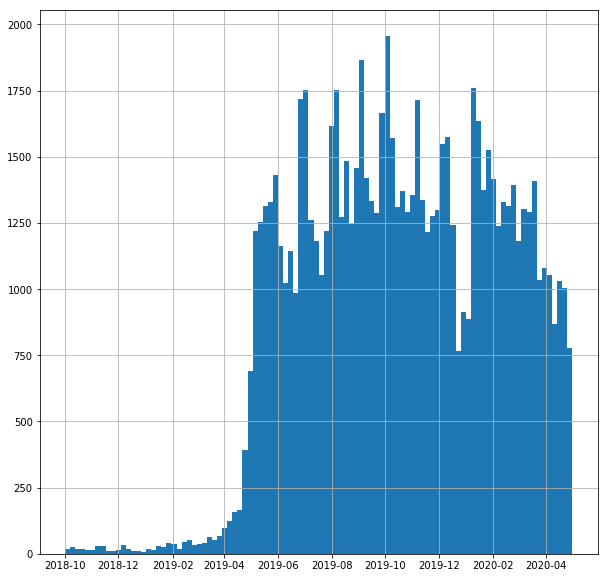

In [9]:
"""
Identifying the pattern of request generation pattern
"""
pmi_df.created_date.hist(bins=100,figsize=(10,10))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


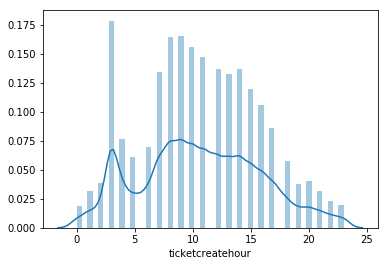

In [66]:
import seaborn as sns

sns.distplot(pmi_df.ticketcreatehour)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


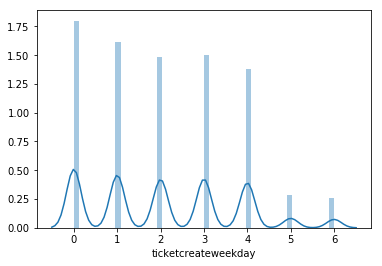

In [79]:
sns.distplot(pmi_df.ticketcreateweekday)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


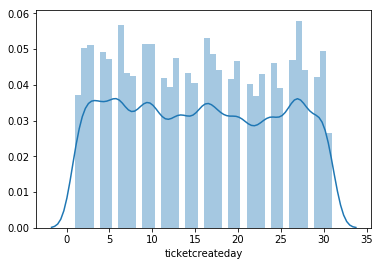

In [91]:

sns.distplot(pmi_df.ticketcreateday)

In [238]:
pmi_df_dervived.category.unique()

array(['Complaint', 'Incident', 'Request for Change',
       'Request for Information'], dtype=object)

In [243]:
pmi_df_dervived=pmi_df[pmi_df.ticket_solving_duration < 500]

pmi_boxplot_rfc=pmi_df_dervived[
            pmi_df_dervived.service_new.isin(['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM']) & 
                           pmi_df_dervived.category.isin(['Request for Change']) ]
pmi_boxplot_incident=pmi_df_dervived[
            pmi_df_dervived.service_new.isin(['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM']) & 
                           pmi_df_dervived.category.isin(['Incident']) ]
pmi_boxplot_rfi=pmi_df_dervived[
            pmi_df_dervived.service_new.isin(['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM']) & 
                           pmi_df_dervived.category.isin(['Request for Information']) ]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


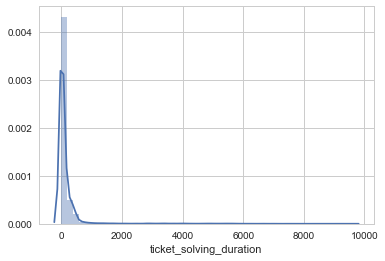

In [236]:
sns.distplot(pmi_df[pmi_df.service_new=='iSMS'].ticket_solving_duration)

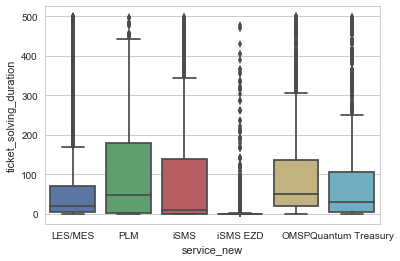

In [244]:
sns.set(style="whitegrid")
sns.boxplot(x=pmi_boxplot_rfc.service_new,y = pmi_boxplot_rfc.ticket_solving_duration,data = pmi_boxplot_rfc)

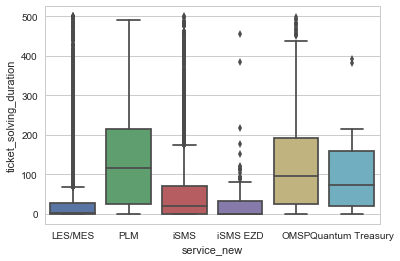

In [245]:
sns.set(style="whitegrid")
sns.boxplot(x=pmi_boxplot_incident.service_new,y = pmi_boxplot_incident.ticket_solving_duration,data = pmi_boxplot_incident)

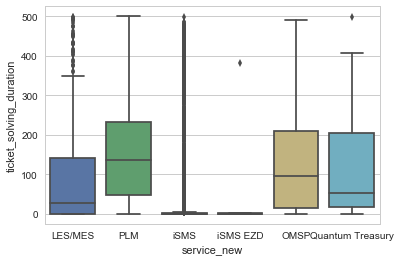

In [246]:
sns.set(style="whitegrid")
sns.boxplot(x=pmi_boxplot_rfi.service_new,y = pmi_boxplot_rfi.ticket_solving_duration,data = pmi_boxplot_rfi)

In [32]:
pmi_df.close_code.value_counts()

Solved (Permanently)             74536
Solved (Workaround)               5791
Not Solved (Gone)                 3100
Not Solved (Unable)               1553
Solved (By User)                   325
Solved (By System)                 191
Solved Remotely (Permanently)       73
Name: close_code, dtype: int64

In [35]:
pmi_df.groupby(['ticketcreateyear','ticketcreatemonth','close_code'])["Number"].count().to_frame("count")

count
ticketcreateyear ticketcreatemonth close_code                          
2018             10                Not Solved (Gone)                  6
                                   Not Solved (Unable)                5
                                   Solved (Permanently)              86
                                   Solved (Workaround)                7
                 11                Not Solved (Gone)                  7
                                   Not Solved (Unable)               11
                                   Solved (Permanently)              72
                                   Solved (Workaround)                8
                 12                Not Solved (Gone)                 13
                                   Not Solved (Unable)               15
                                   Solved (Permanently)              53
                                   Solved (Workaround)                5
2019             1                 Not Solved (Gone)                  9
                                   Not Solved (Unable)               22
                                   Solved (Permanently)             103
                                   Solved (Workaround)                6
                 2                 Not Solved (Gone)                 22
                                   Not Solved (Unable)               20
                                   Solved (Permanently)             104
                                   Solved (Workaround)               34
                 3                 Not Solved (Gone)                 28
                                   Not Solved (Unable)               32
                                   Solved (Permanently)             171
                                   Solved (Workaround)               48
                 4                 Not Solved (Gone)                100
                                   Not Solved (Unable)               51
                                   Solved (Permanently)             963
                                   Solved (Workaround)              130
                 5                 Not Solved (Gone)                272
                                   Not Solved (Unable)              230
...                                                                 ...
                 12                Solved (Permanently)            5673
                                   Solved (Workaround)              356
                                   Solved Remotely (Permanently)      2
2020             1                 Not Solved (Gone)                194
                                   Not Solved (Unable)               73
                                   Solved (By System)                42
                                   Solved (By User)                  62
                                   Solved (Permanently)            7194
                                   Solved (Workaround)              453
                                   Solved Remotely (Permanently)     11
                 2                 Not Solved (Gone)                166
                                   Not Solved (Unable)              144
                                   Solved (By System)                27
                                   Solved (By User)                  53
                                   Solved (Permanently)            5417
                                   Solved (Workaround)              478
                 3                 Not Solved (Gone)                176
                                   Not Solved (Unable)              125
                                   Solved (By System)                35
                                   Solved (By User)                  66
                                   Solved (Permanently)            5729
                                   Solved (Workaround)              498
                                   Solved Remotely (Permanently)      5
                 4                

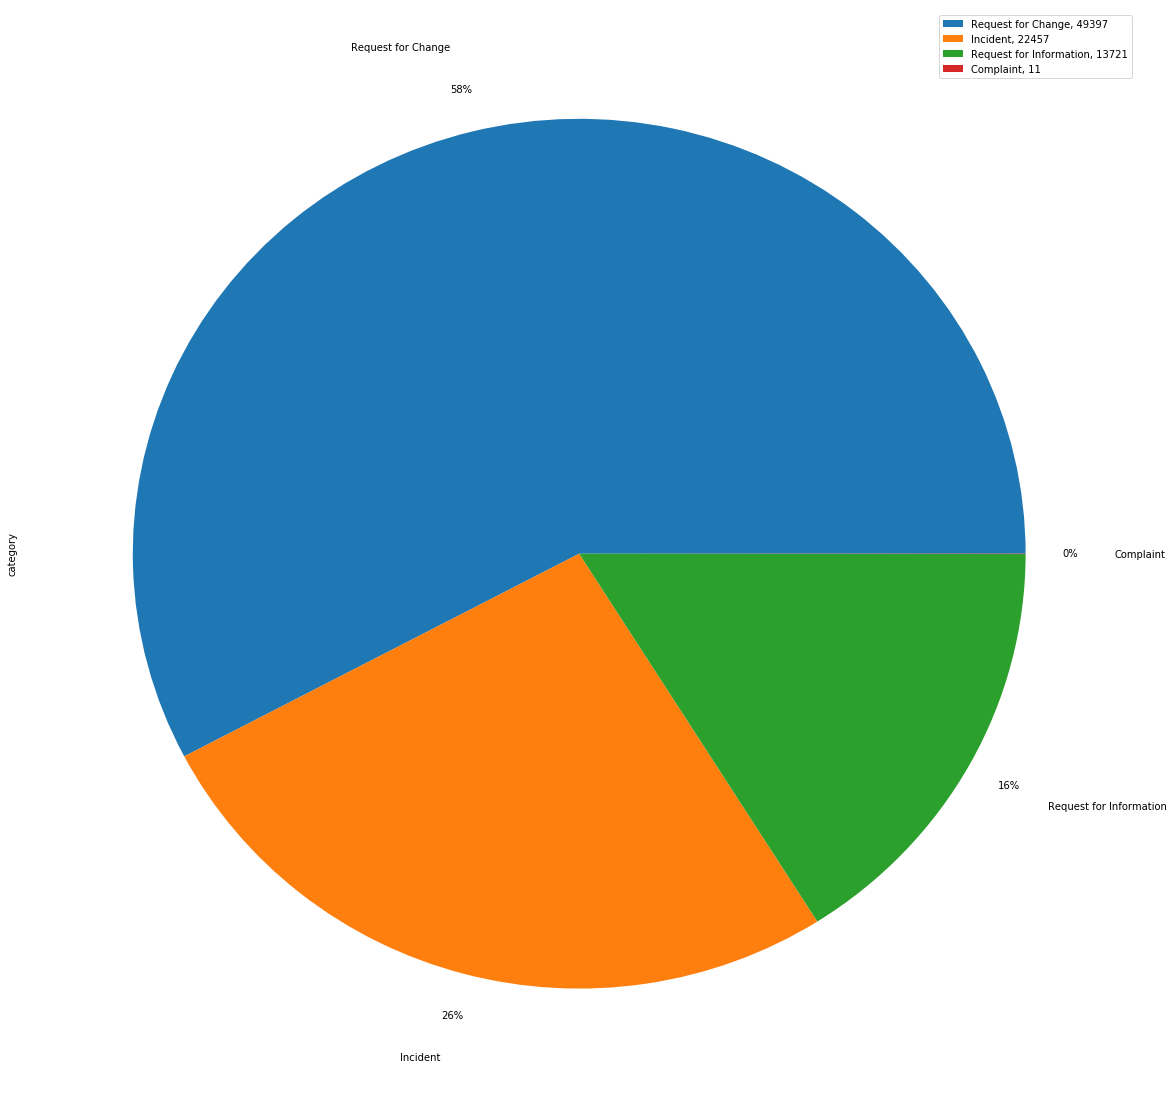

In [36]:
labels =pmi_df.category.value_counts().keys()
sizes = pmi_df.category.value_counts()
pmi_df.category.value_counts().plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [37]:
pmi_df.category.value_counts()


Request for Change         49397
Incident                   22457
Request for Information    13721
Complaint                     11
Name: category, dtype: int64

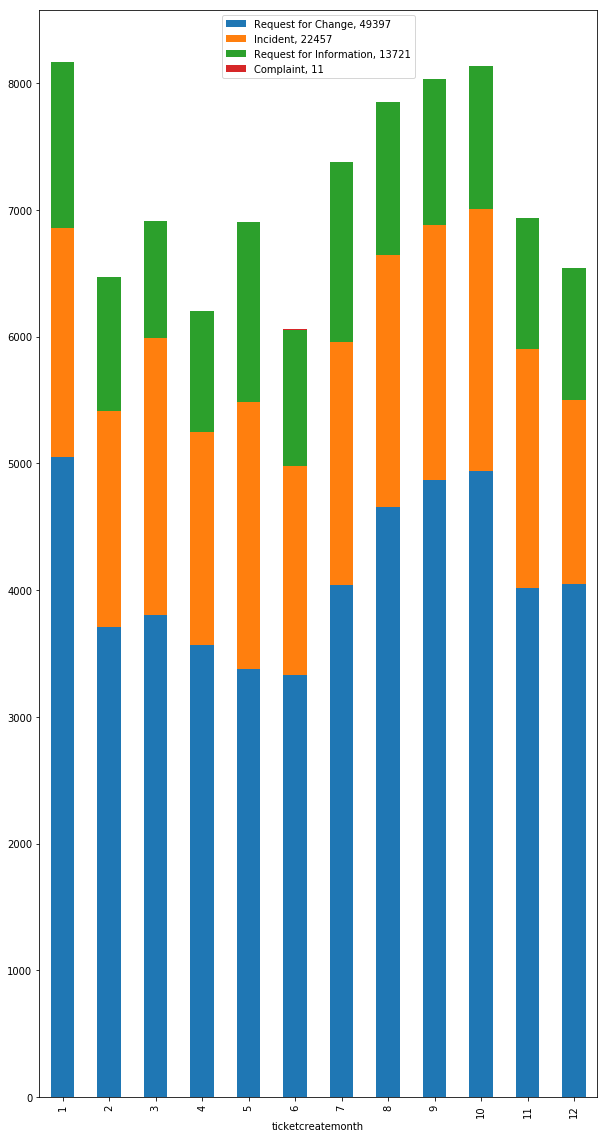

In [160]:
sizes= pmi_df.category.value_counts()
labels = pmi_df.category.value_counts().keys()
pmi_df.groupby(['ticketcreatemonth','category' ])["Number"].count().unstack().plot(y=['Request for Change','Incident','Request for Information', 'Complaint'],kind='bar', stacked=True,figsize=(10,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

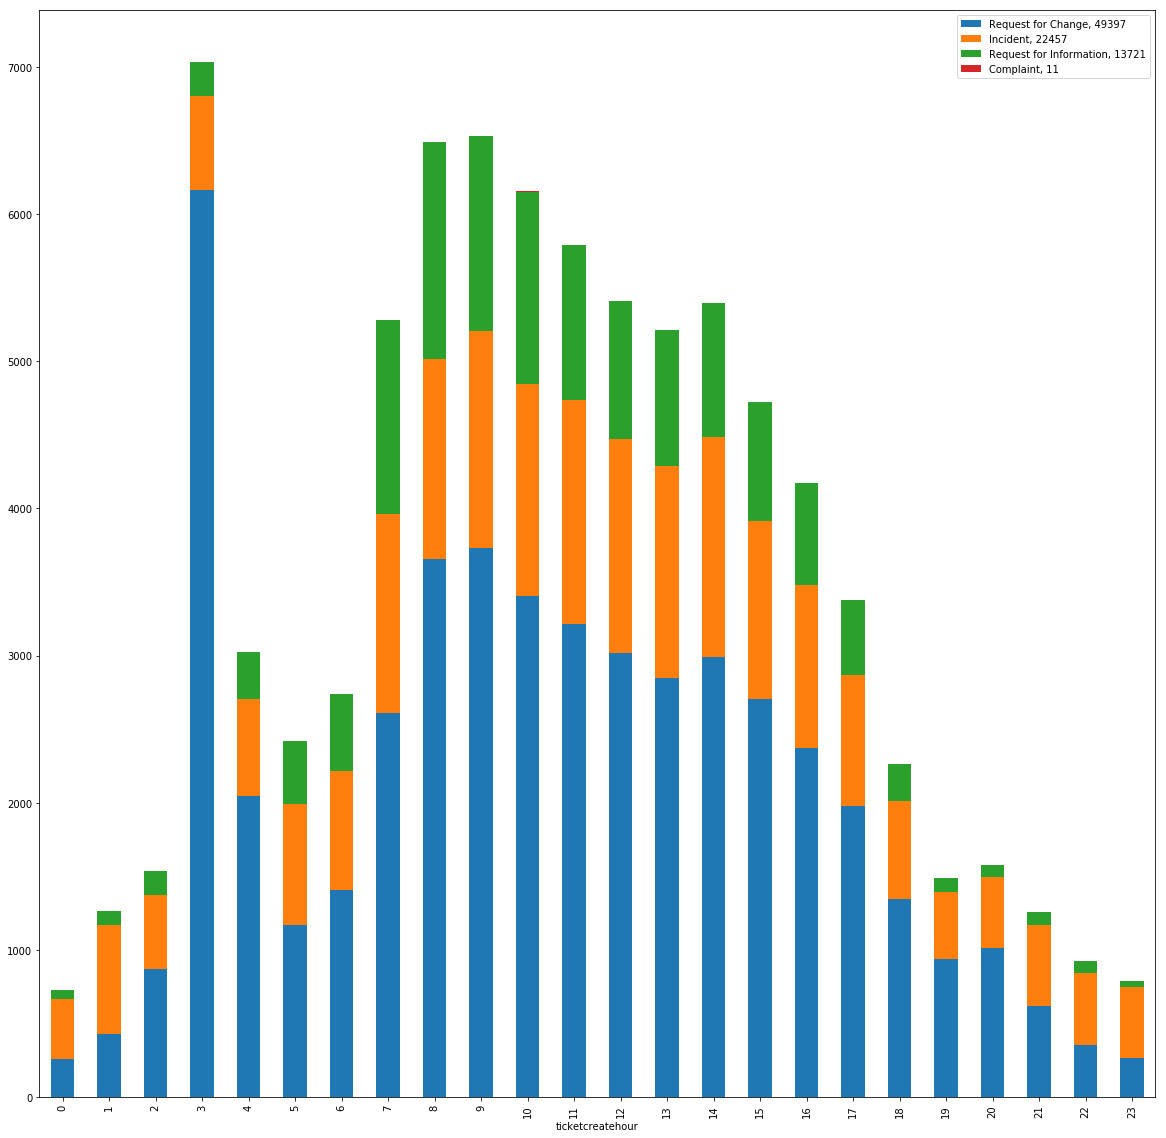

In [44]:
sizes= pmi_df.category.value_counts()
labels = pmi_df.category.value_counts().keys()
pmi_df.groupby(['ticketcreatehour','category' ])["Number"].count().unstack().plot(y=['Request for Change','Incident','Request for Information', 'Complaint'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

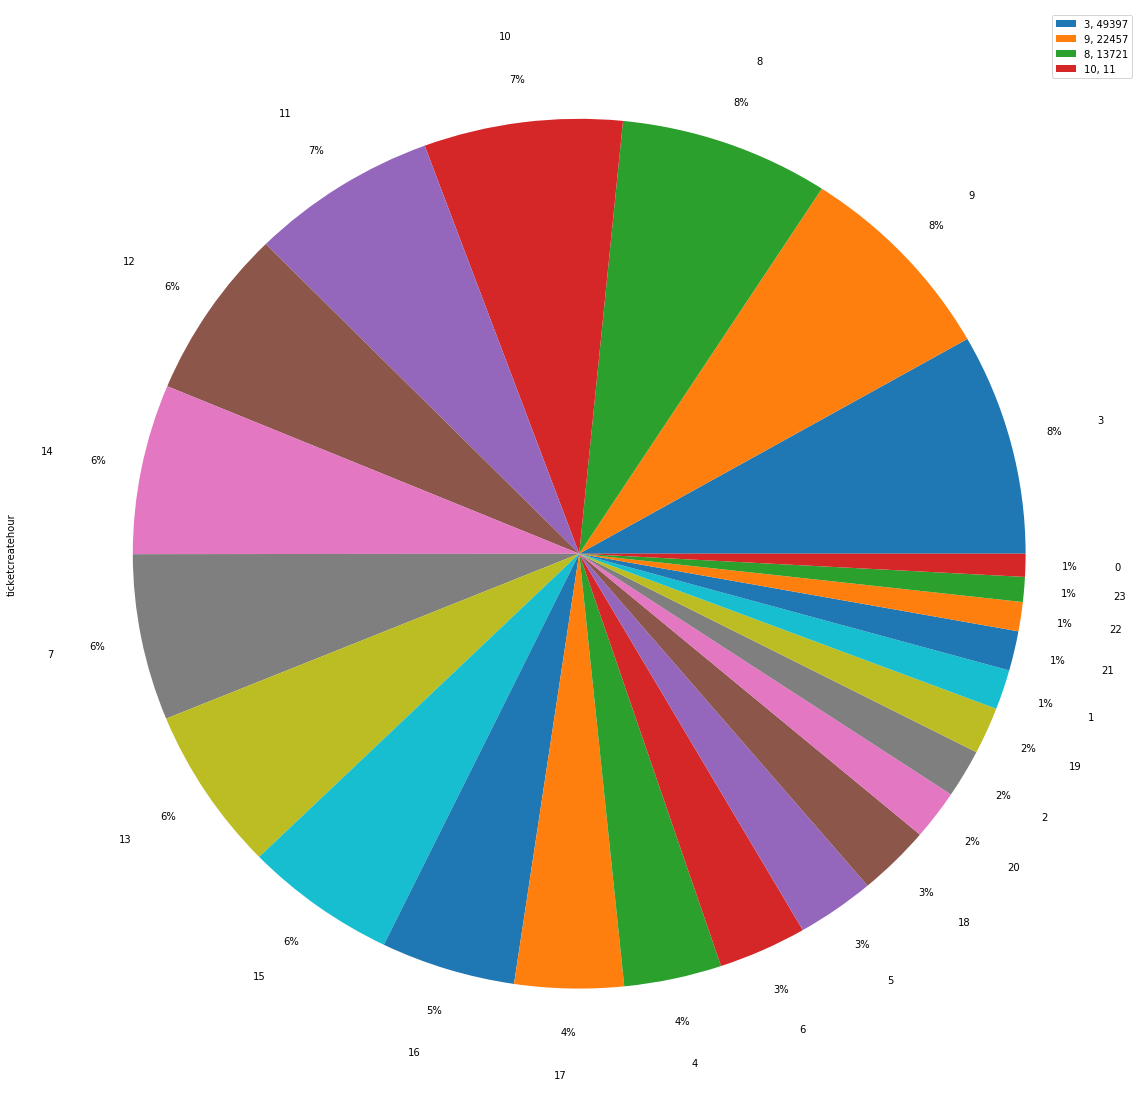

In [45]:
size= pmi_df.ticketcreatehour.value_counts()
labels = pmi_df.ticketcreatehour.value_counts().keys()

pmi_df.ticketcreatehour.value_counts().plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [47]:
seriesObj1 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 3 and x['ticketcreatehour']  < 12) else False , axis=1)
 
# Count number of True in series
numOfRows1 = len(seriesObj1[seriesObj1 == True].index)
 
print('Ticket count created at 3 CET and less than 12 CET  : ', numOfRows1)
#10286

seriesObj2 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 10 and x['ticketcreatehour']  < 19) else False , axis=1)
 
# Count number of True in series
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
 
print('Ticket count created at 10 CET and less than 19 CET  : ', numOfRows2)

seriesObj3 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 19 and x['ticketcreatehour']  < 24) else False , axis=1)
 
# Count number of True in series
numOfRows3 = len(seriesObj3[seriesObj3 == True].index)
 
print('Ticket count created at 19 CET and less than 24 CET  : : ', numOfRows3)

seriesObj4 = pmi_df.apply(lambda x: True if (x['ticketcreatehour'] >= 1 and x['ticketcreatehour']  < 3) else False , axis=1)
 
# Count number of True in series
numOfRows4 = len(seriesObj4[seriesObj4 == True].index)
 
print('Ticket count created at 24 CET and less than 3 CET  : : ', numOfRows4)

sum1 = numOfRows1+ numOfRows2 + numOfRows3 + numOfRows4
print("total " , sum1)


Ticket count created at 3 CET and less than 12 CET  :  45471
Ticket count created at 10 CET and less than 19 CET  :  42493
Ticket count created at 19 CET and less than 24 CET  : :  6037
Ticket count created at 24 CET and less than 3 CET  : :  2801
total  96802


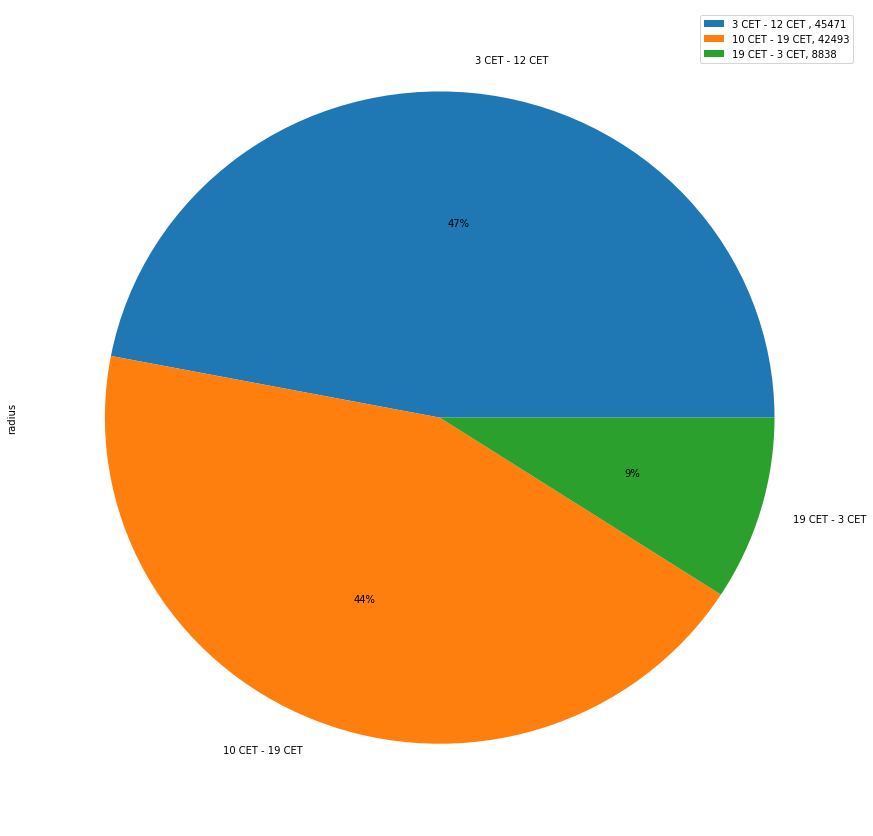

In [49]:
df = pd.DataFrame({
                   'radius': [numOfRows1, numOfRows2 , numOfRows3 + numOfRows4]},
                   index=['3 CET - 12 CET ', '10 CET - 19 CET', '19 CET - 3 CET']).plot(kind='pie',autopct='%1.0f%%',y='radius', figsize=(15, 15)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(['3 CET - 12 CET ', '10 CET - 19 CET', '19 CET - 3 CET'], [numOfRows1, numOfRows2 , numOfRows3 + numOfRows4])])

In [152]:
import re

def application_name(str,word_index):
    return(str[:word_index].strip())

pmi_df["service_new"] = pmi_df.service.apply(lambda x : application_name(x,x.find('Application')))

In [153]:
pmi_df.columns

Index(['Number', 'short_description', 'service', 'description', 'category',
       'impact', 'assignment_group', 'close_code', 'close_notes',
       'create_time', 'resolve_time', 'applicationtype', 'ticketcreatehour',
       'ticketcreatemonth', 'ticketcreateday', 'ticketcreateyear',
       'ticketcreateweekday', 'ticket_solving_duration', 'service_new'],
      dtype='object')

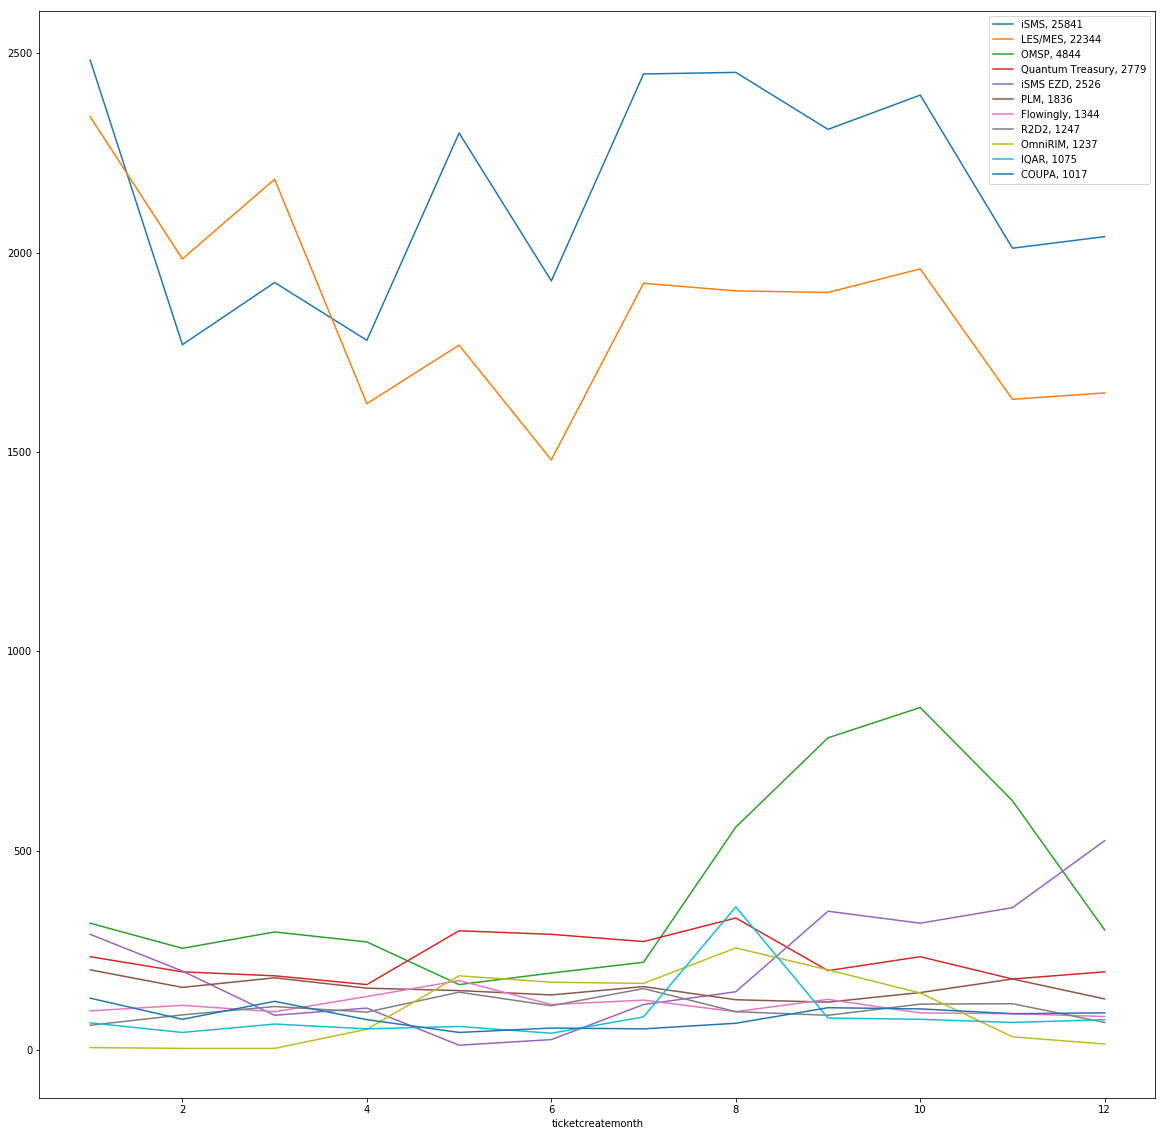

In [169]:

sizes = pmi_df.service_new.value_counts()
labels = pmi_df.service_new.value_counts().keys()

y_value=['iSMS','LES/MES','OMSP','Quantum Treasury','iSMS EZD','PLM','Flowingly','R2D2', 'OmniRIM','IQAR','COUPA']
  
             
pmi_df.groupby(['ticketcreatemonth','service_new' ])["Number"].count().unstack().plot(y=y_value,kind='line',
                                                                                            stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

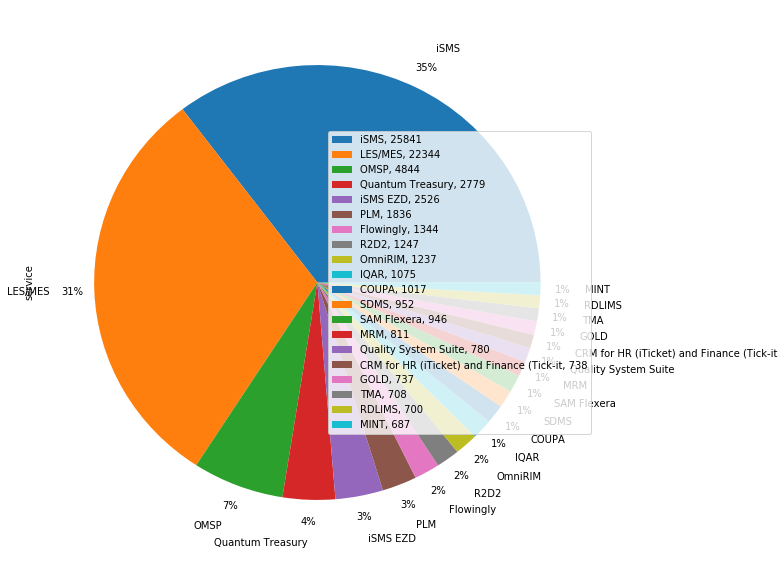

In [177]:
labels =pmi_df.service_new.value_counts().keys()
sizes = pmi_df.service_new.value_counts()


pmi_df.service_new.value_counts().nlargest(20).plot(kind='pie',
                                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(10,10)).legend( loc = 'right', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [176]:
pmi_df.service_new.value_counts().nlargest(20)

iSMS                                         25841
LES/MES                                      22344
OMSP                                          4844
Quantum Treasury                              2779
iSMS EZD                                      2526
PLM                                           1836
Flowingly                                     1344
R2D2                                          1247
OmniRIM                                       1237
IQAR                                          1075
COUPA                                         1017
SDMS                                           952
SAM Flexera                                    946
MRM                                            811
Quality System Suite                           780
CRM for HR (iTicket) and Finance (Tick-it      738
GOLD                                           737
TMA                                            708
RDLIMS                                         700
MINT                           

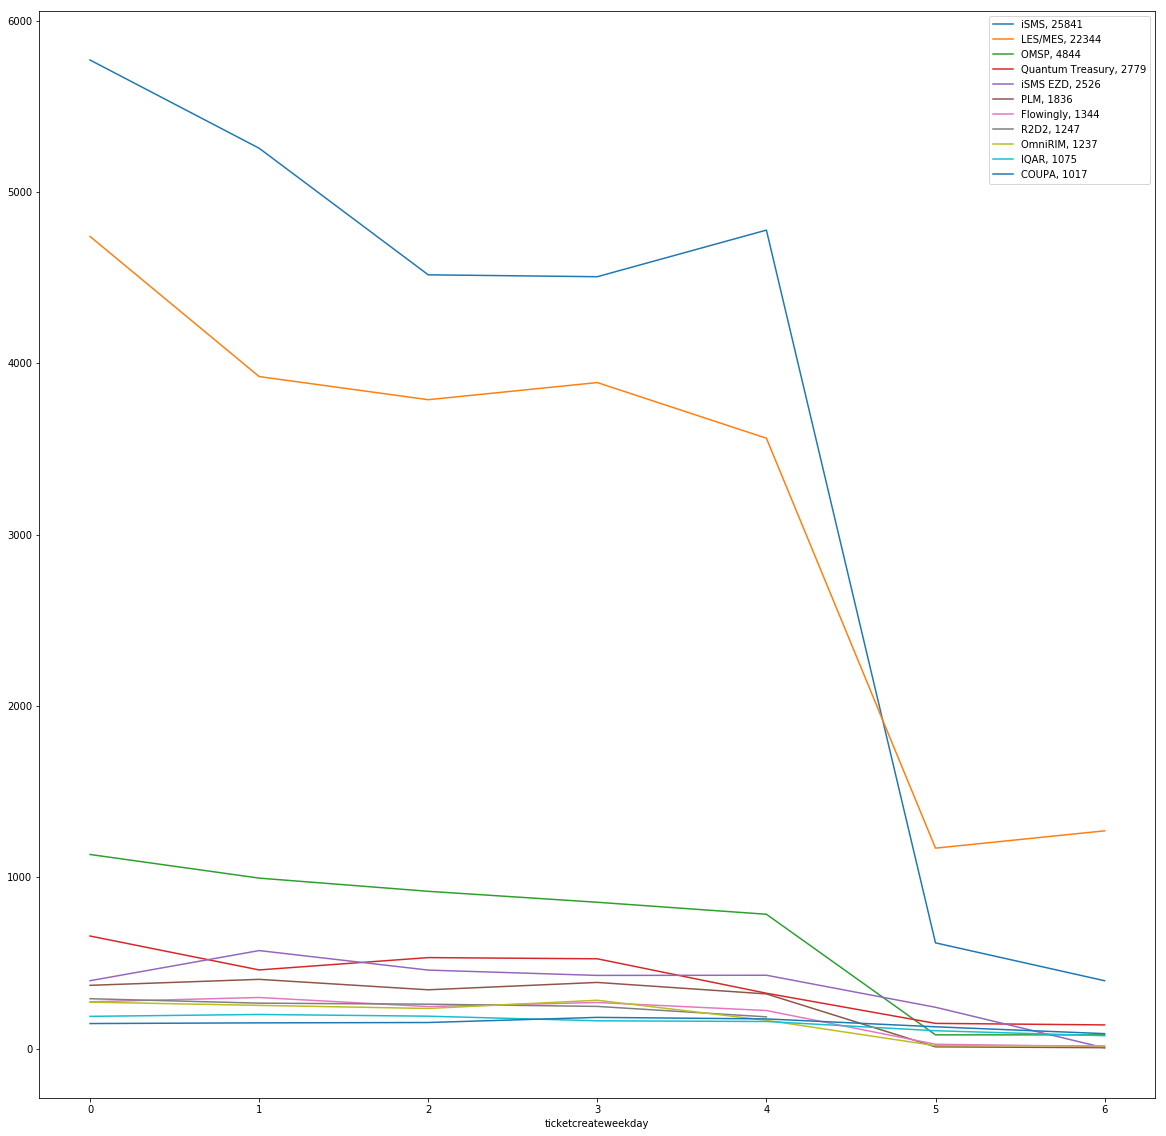

In [164]:

sizes = pmi_df.service_new.value_counts()
labels = pmi_df.service_new.value_counts().keys()
pmi_df.groupby(['ticketcreateweekday','service_new' ])["Number"].count().unstack().plot(y=y_value,kind='line',
                                                                                            stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

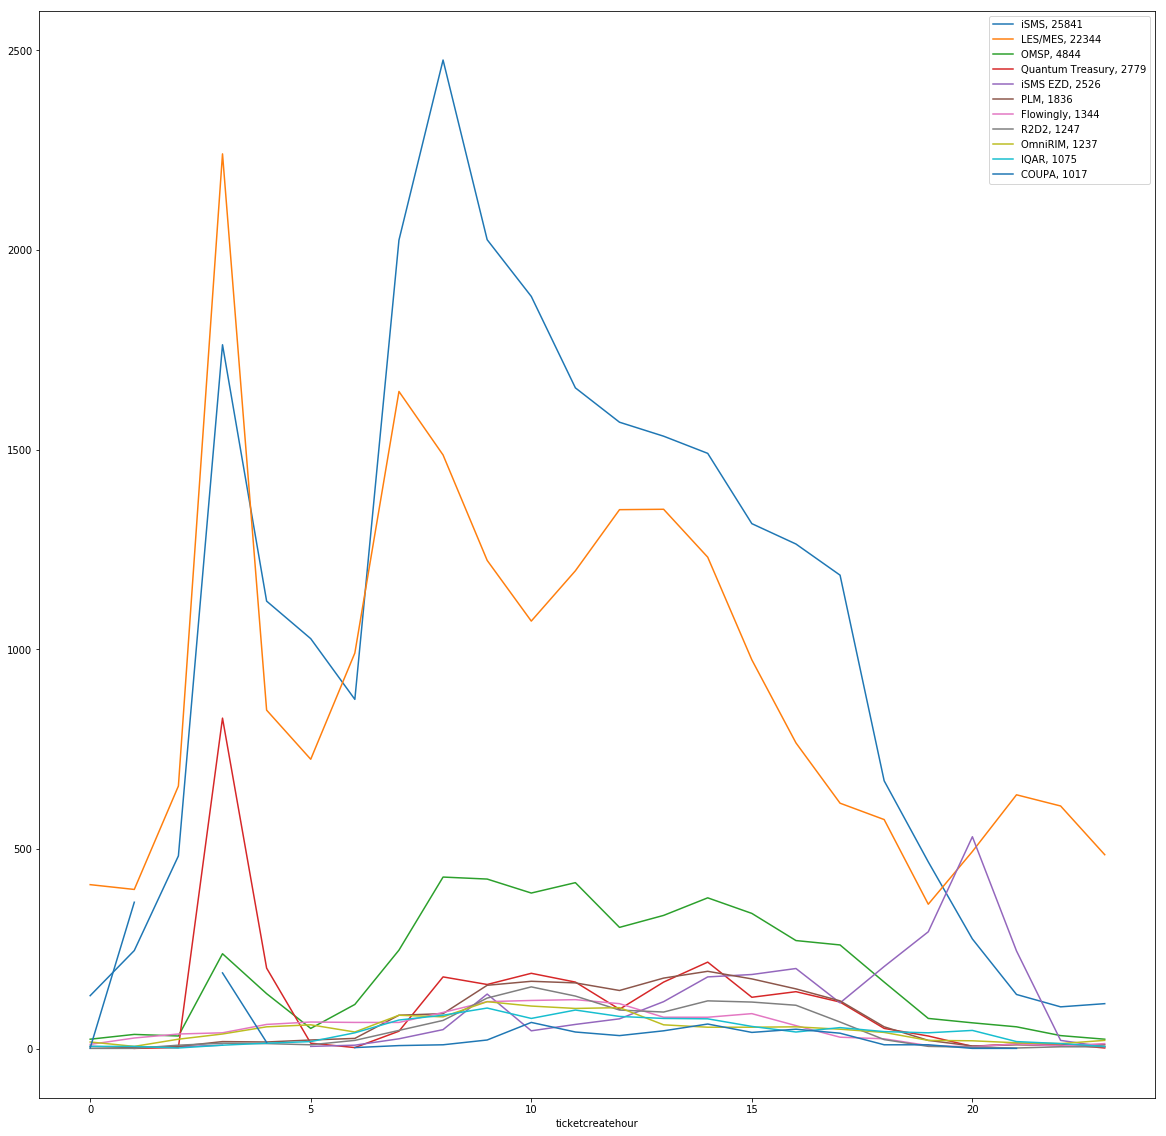

In [157]:

sizes = pmi_df.service_new.value_counts()
labels = pmi_df.service_new.value_counts().keys()
pmi_df.groupby(['ticketcreatehour','service_new' ])["Number"].count().unstack().plot(y=y_value,kind='line',
                                                                                            stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

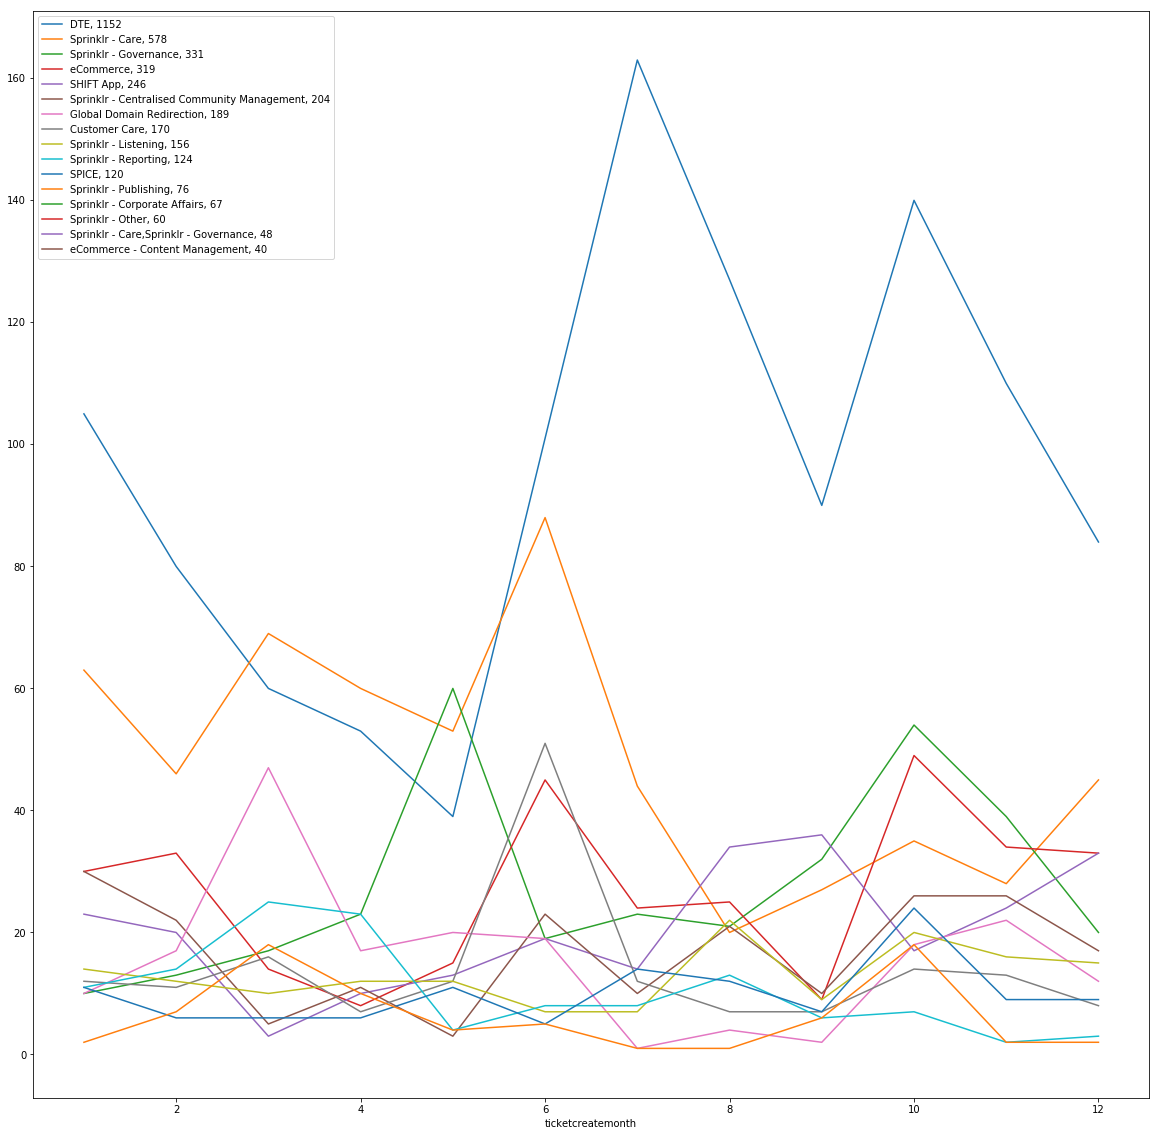

In [21]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatemonth','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

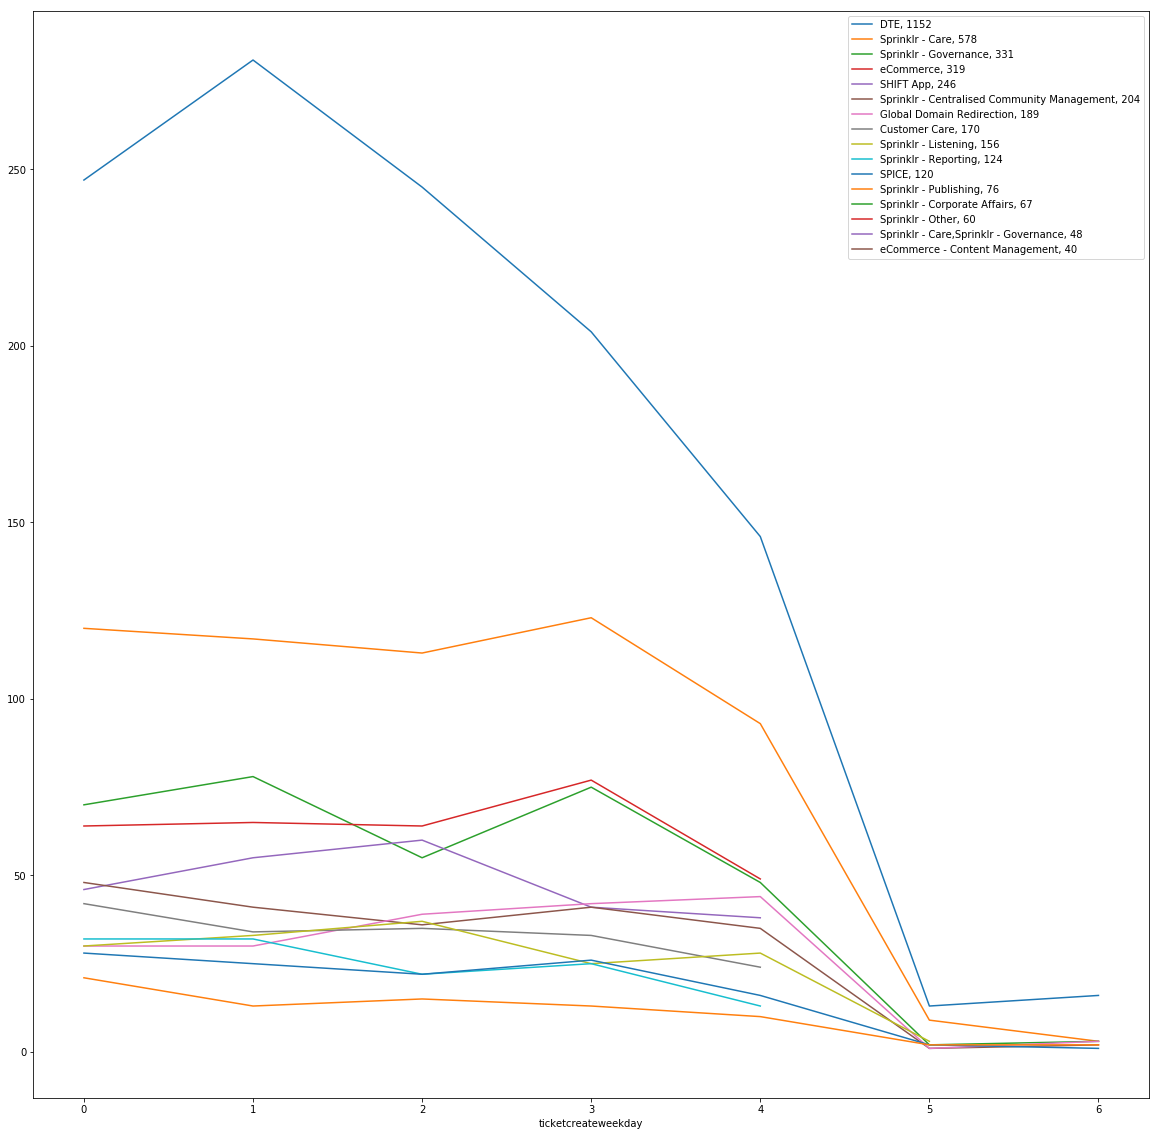

In [22]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreateweekday','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

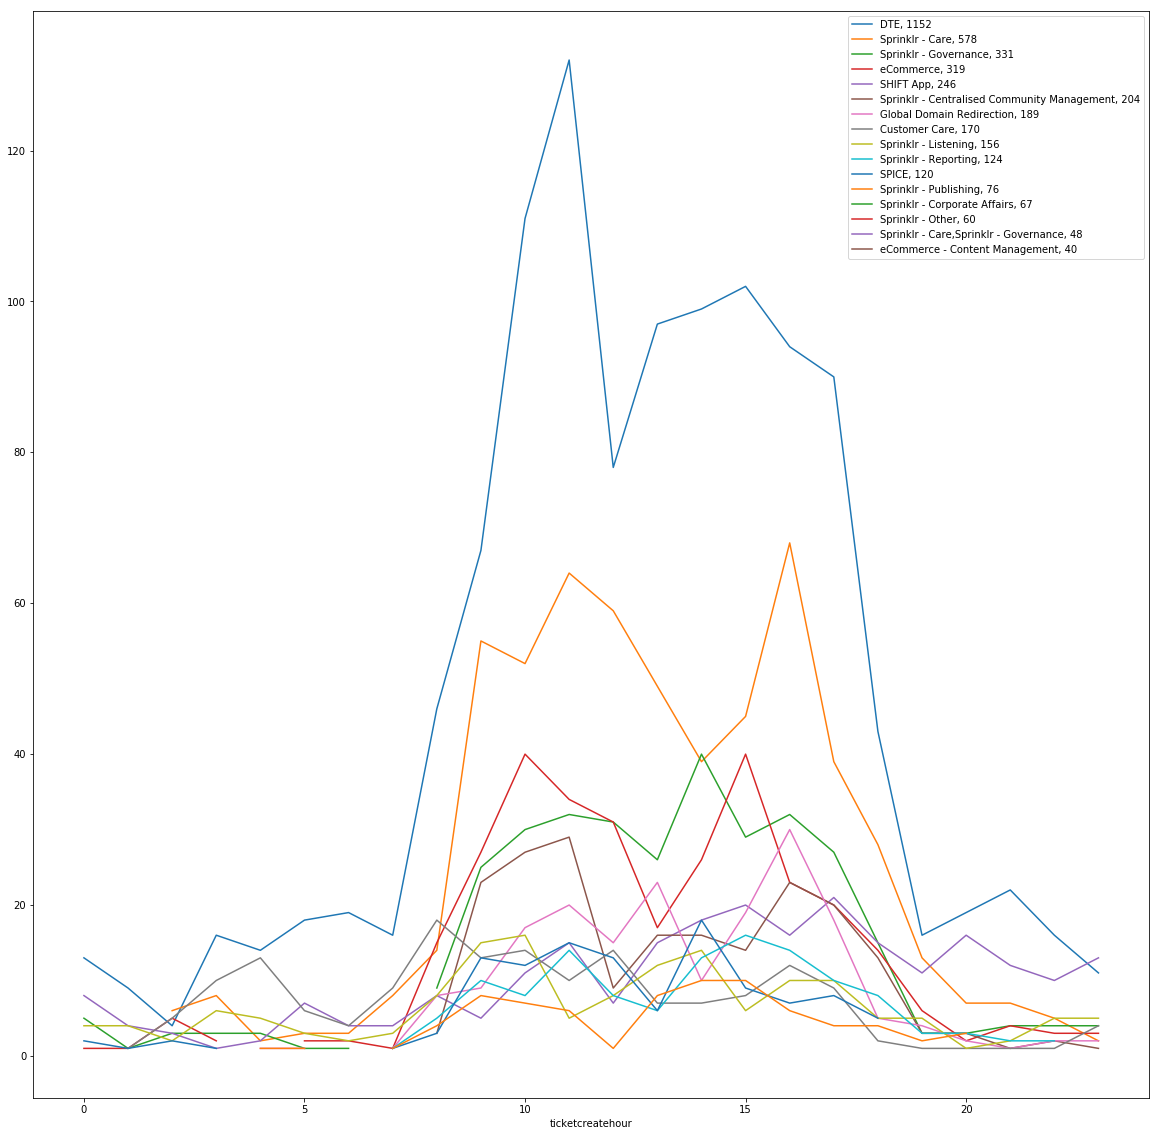

In [23]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatehour','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

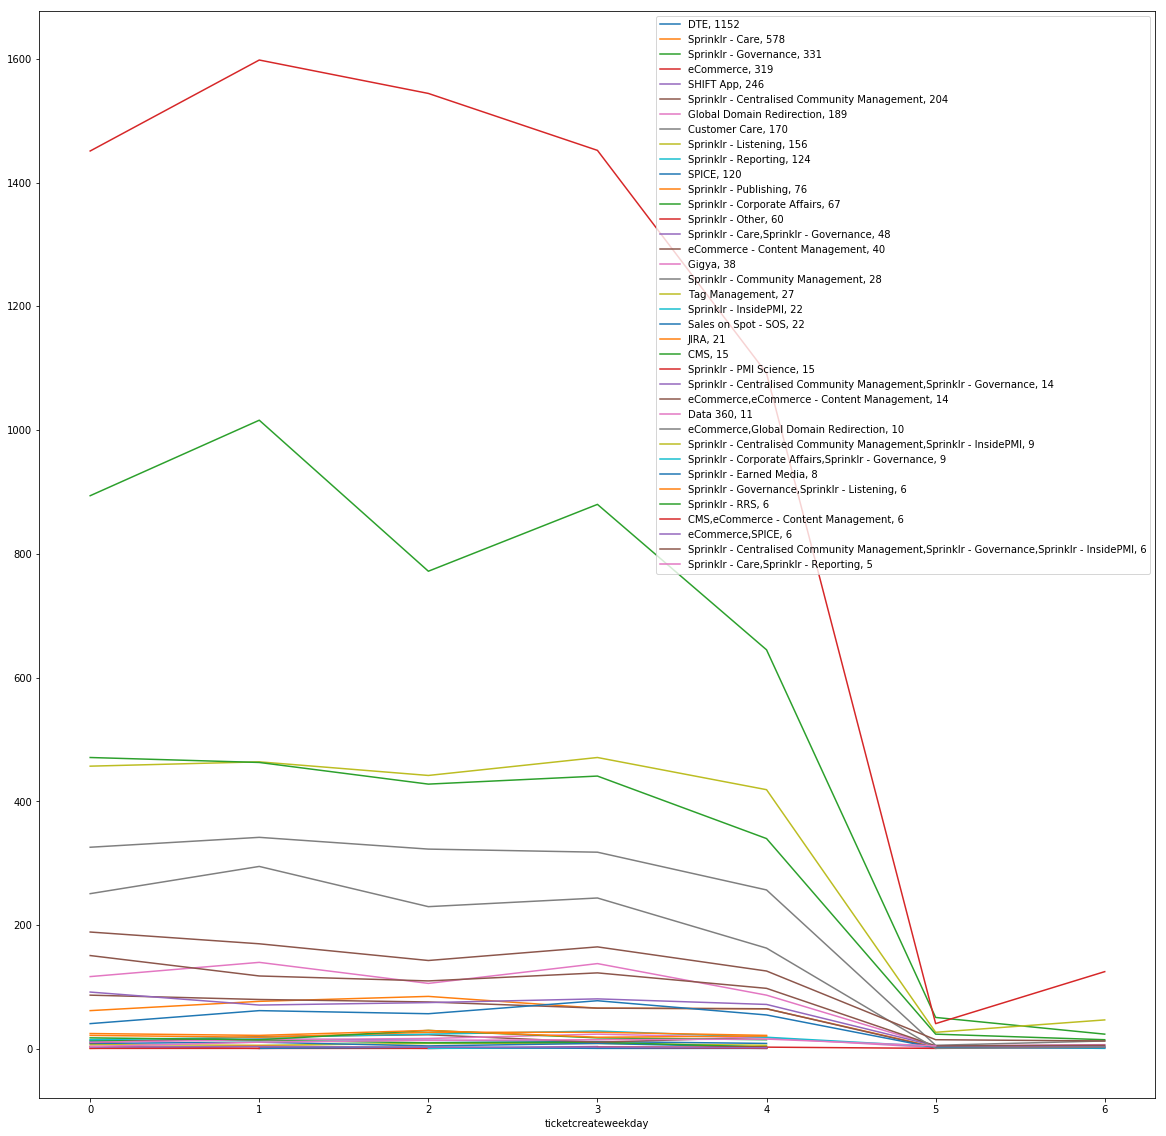

In [24]:
pmi_df.groupby(['ticketcreateweekday','impactedproducts' ])["issueid"].count().unstack().plot(kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(sizes.keys(), sizes)])

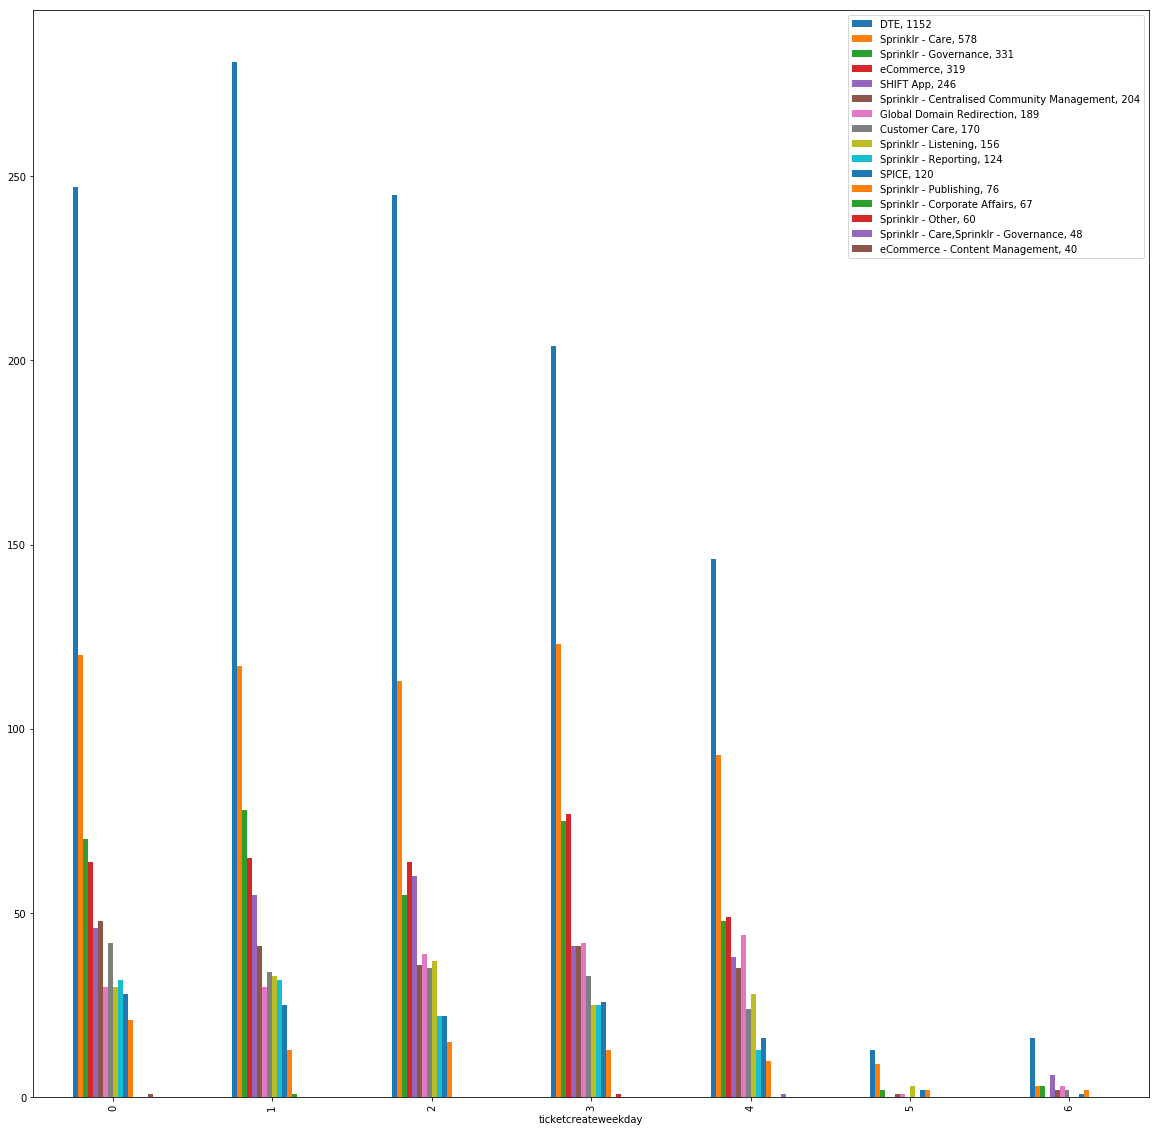

In [25]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreateweekday','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='bar', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [26]:
size

10    2376
11    2350
15    2100
14    1988
16    1974
13    1919
9     1806
12    1788
17    1506
18     947
8      814
19     488
20     439
7      386
21     344
22     340
6      267
5      251
3      251
4      248
23     245
2      167
0      150
1      148
Name: ticketcreatehour, dtype: int64

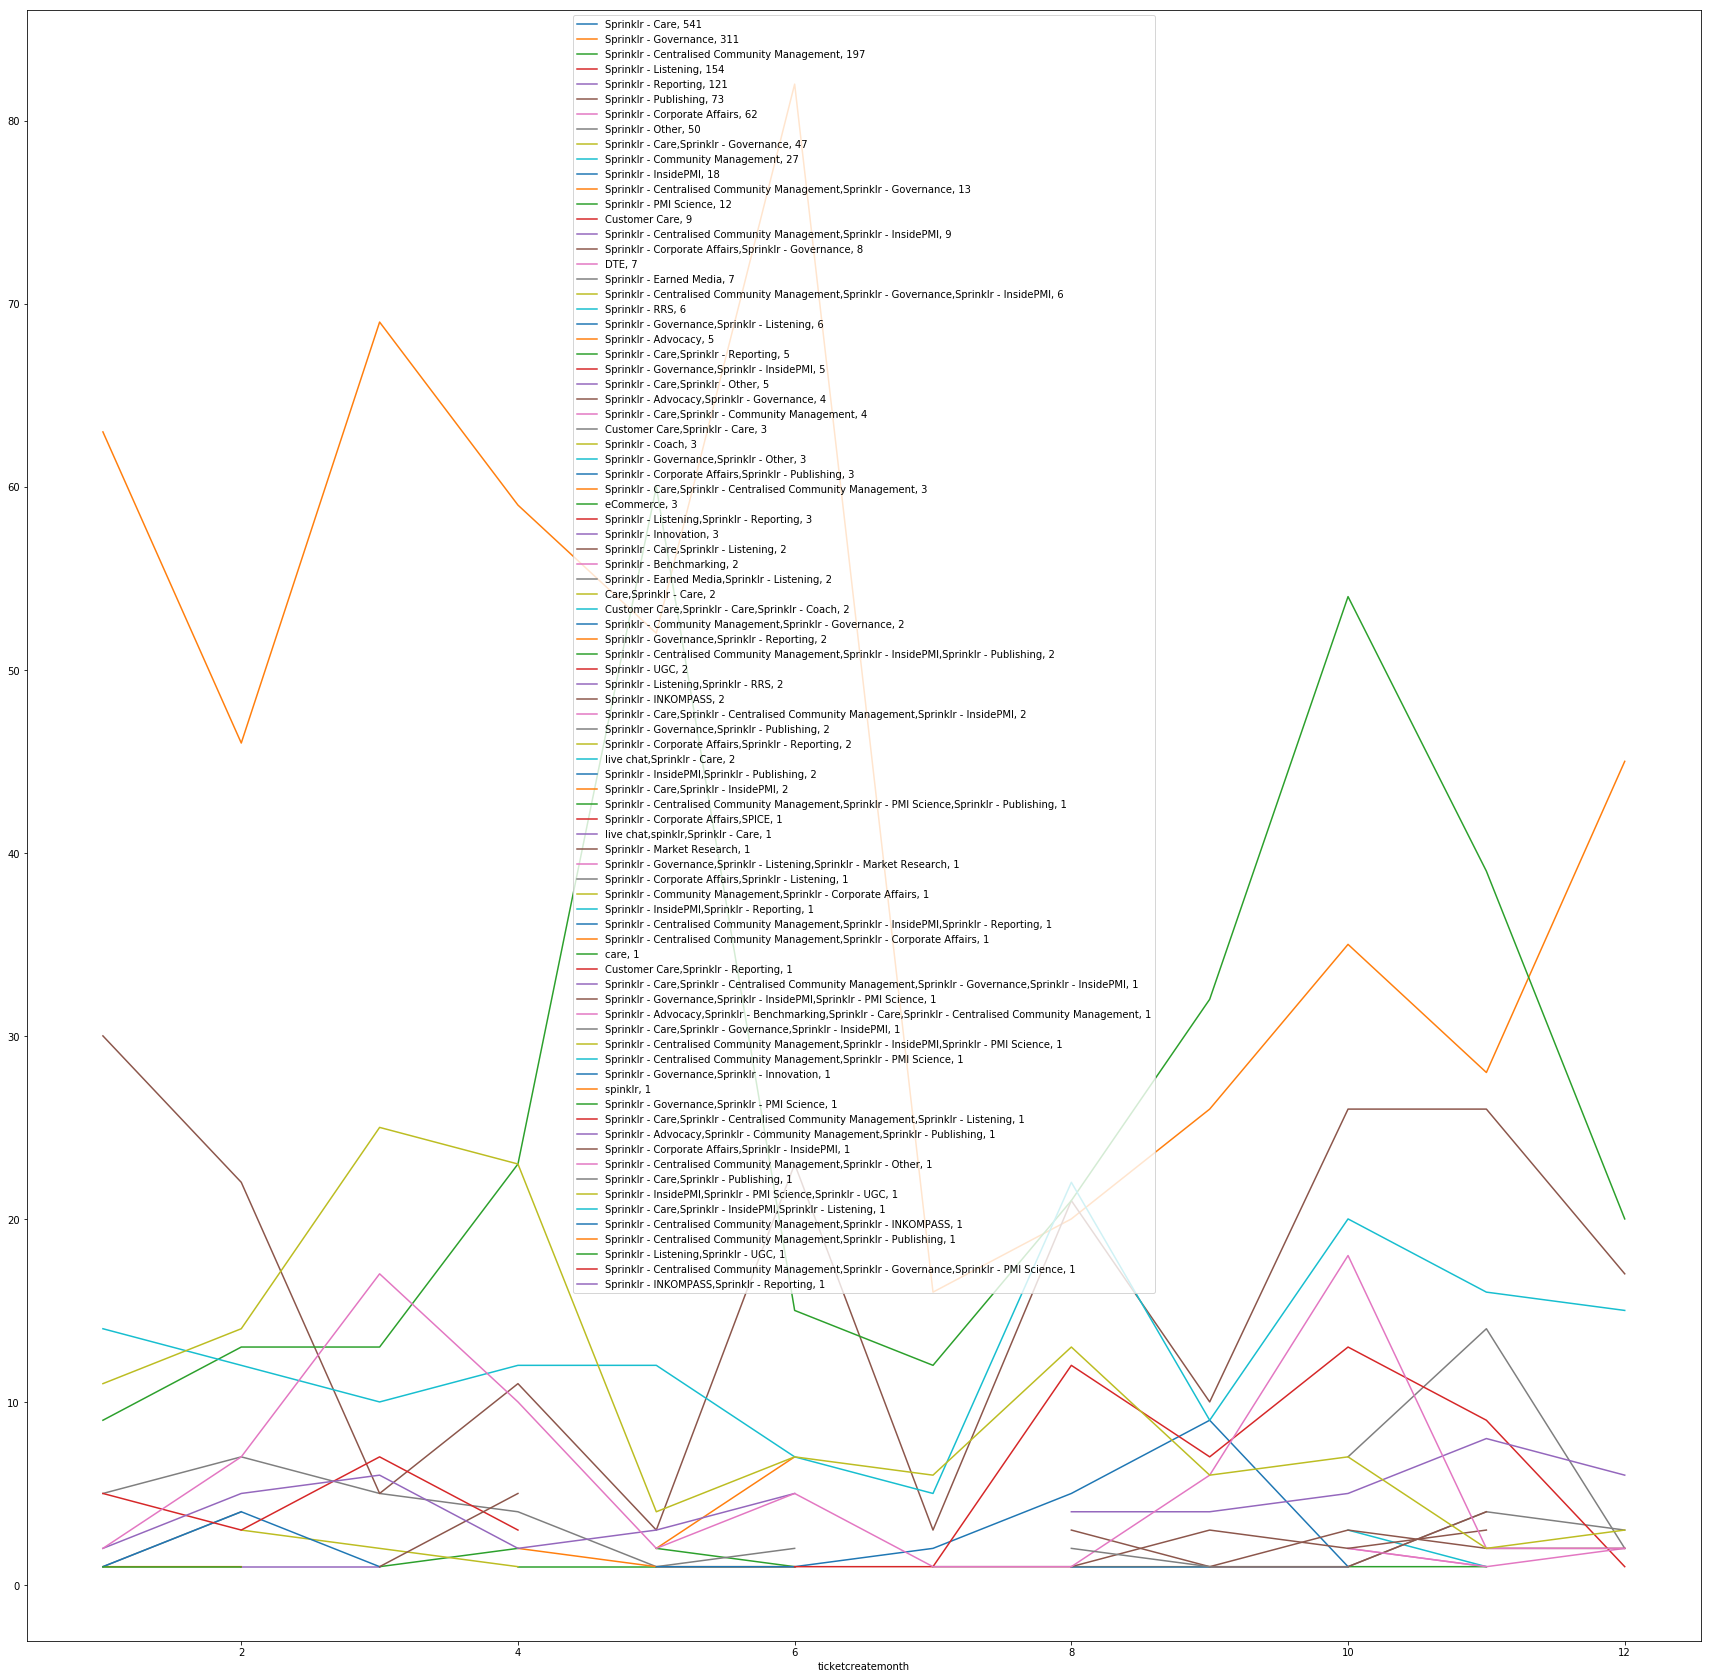

In [27]:
pmi_spriklr=pmi_df[pmi_df["impactedproducts"] == 'Sprinklr']
pmi_df[pmi_df["impactedproducts"] == 'Sprinklr'].groupby(['ticketcreatemonth','components' ])["issueid"].count().unstack().plot(kind='line', stacked=False,figsize=(30,30)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(pmi_spriklr.components.value_counts().keys(),pmi_spriklr.components.value_counts() )])

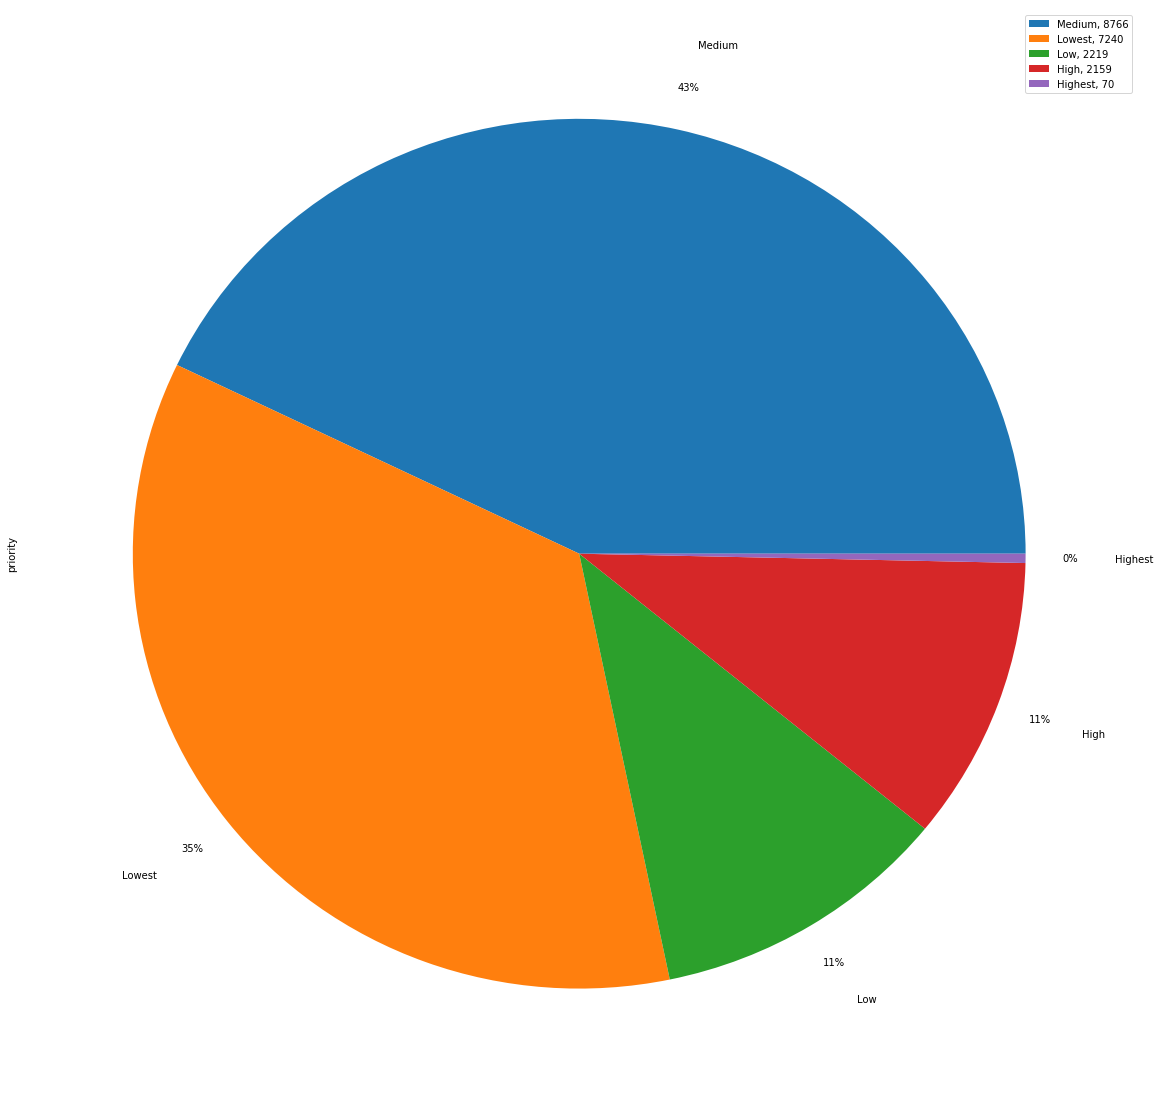

In [33]:
pmi_df_nojune = pmi_df[pmi_df.ticketcreatemonth != 6]

label = pmi_df_nojune.priority.value_counts().keys()
size = pmi_df_nojune.priority.value_counts()
pmi_df_nojune.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [29]:
pmi_df_DTE

NameError: name 'pmi_df_DTE' is not defined

In [ ]:
pmi_df_Sprinklr= pmi_df[pmi_df["impactedproducts"] == 'Digital Trade Engagement (DTE)']


label = pmi_df_Sprinklr.priority.value_counts().keys()
size = pmi_df_Sprinklr.priority.value_counts()
pmi_df_Sprinklr.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [ ]:
pmi_df_Sprinklr= pmi_df[pmi_df["impactedproducts"] == 'B2C eCommerce']

label = pmi_df_Sprinklr.priority.value_counts().keys()
size = pmi_df_Sprinklr.priority.value_counts()
pmi_df_Sprinklr.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [ ]:
pmi_df_Sprinklr= pmi_df[pmi_df["impactedproducts"] == 'Customer Care']

label = pmi_df_Sprinklr.priority.value_counts().keys()
size = pmi_df_Sprinklr.priority.value_counts()
pmi_df_Sprinklr.priority.value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,figsize=(20,20)).legend( loc = 0, labels=['%s, %1.0f' % (l, s) for l, s in zip(label,size )])

In [ ]:
pmi_without_completed=pmi_df[pmi_df['status'] != 'Completed']
pmi_without_completed_rejected=pmi_without_completed[pmi_without_completed['status'] != 'Rejected']

labels = pmi_without_completed_rejected.status.value_counts().keys()
sizes = pmi_without_completed_rejected.status.value_counts()

pmi_without_completed_rejected.groupby(['status','ticketcreateyear'])["issueid"].count().unstack().plot(kind='barh',stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.1f' % (al, aws) for al, aws in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatemonth','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreateweekday','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:

sizes= pmi_df.components.value_counts()
labels =  pmi_df.components.value_counts().keys() 


pmi_df.groupby(['ticketcreatehour','components' ])["issueid"].count().unstack().plot(y=['DTE', 'Sprinklr - Care', 'Sprinklr - Governance', 'eCommerce',
       'SHIFT App', 'Sprinklr - Centralised Community Management',
       'Global Domain Redirection', 'Customer Care', 'Sprinklr - Listening',
       'Sprinklr - Reporting','SPICE' ,'Sprinklr - Publishing',
       'Customer Care,SPICE', 'Customer Care,Sprinklr - Reporting',
       'Sprinklr - Centralised Community Management,Sprinklr - INKOMPASS',
       'Sprinklr - InsidePMI,Sprinklr - PMI Science,Sprinklr - UGC' ],kind='line', stacked=False,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_df_highest.impactedproducts.value_counts()

In [ ]:


pmi_df_highest = pmi_df[pmi_df.priority=='Highest']
sizes= pmi_df_highest.impactedproducts.value_counts()
labels =  pmi_df_highest.impactedproducts.value_counts().keys() 

pmi_df_highest.groupby(['ticketcreatemonth','priority' ,'impactedproducts'])["issueid"].size().unstack().plot(y=['B2C eCommerce','Digital Trade Engagement (DTE)'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:


pmi_df_highest = pmi_df[pmi_df.priority=='Highest']
sizes= pmi_df_highest.impactedproducts.value_counts()
labels =  pmi_df_highest.impactedproducts.value_counts().keys() 

pmi_df_highest.groupby(['ticketcreateweekday','priority' ,'impactedproducts'])["issueid"].size().unstack().plot(y=['B2C eCommerce','Digital Trade Engagement (DTE)'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:


pmi_df_highest = pmi_df[pmi_df.priority=='Highest']
sizes= pmi_df_highest.impactedproducts.value_counts()
labels =  pmi_df_highest.impactedproducts.value_counts().keys() 

pmi_df_highest.groupby(['ticketcreatehour','priority' ,'impactedproducts'])["issueid"].size().unstack().plot(y=['B2C eCommerce','Digital Trade Engagement (DTE)','SHIFT App' , 'Unica','Drupal 1.5 iqos.com' , 'Consumer DB'],kind='bar', stacked=True,figsize=(20,20)).legend( loc = 'best', labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)])

In [ ]:
pmi_df_satisfacton= pmi_df[pmi_df['satisfaction'].apply(lambda x: x in ['5', '1', '2', '4', '3'])]
pmi_df_satisfacton["satisfaction"] = pd.to_numeric(pmi_df_satisfacton["satisfaction"])

In [ ]:
pmi_df_satisfacton.describe()

In [179]:
pmi_df.head()

Number                                  short_description  \
0     SRQ#618  The Job pmi_erp_iqar_GCRS_Prod_Vol_am failed (...   
1    SRQ#2207                   KeySurvey/Issue- FWP Access 24X7   
2  SRQ#185315                         PMPT // PO 4502527657 XE05   
3  SRQ#181747               El reporte de QI no funciona para F3   
4  SRQ#179049  SEE P1 Information - User needs information ab...   

                              service  \
0            IQAR Application for PMI   
1  On-line Survey Application for PMI   
2        LES/MES Application for PMPT   
3        LES/MES Application for PMMX   
4        LES/MES Application for PMCS   

                                         description   category impact  \
0  Alert Type: The Job pmi_erp_iqar_GCRS_Prod_Vol...  Complaint   None   
1  Dear Kapil,  Request you to please check the f...  Complaint   None   
2  \n\nFrom: Borges, Goncalo (contracted) \nSent:...  Complaint   None   
3  \nEstaba viendo en F3 que no aparece el report...  Complaint   None   
4  User needs info if ASN file can be generated f...  Complaint   None   

                        assignment_group            close_code  \
0         Global Backlog Reduction Group   Not Solved (Unable)   
1         PM India IS End User Computing  Solved (Permanently)   
2         PM Portugal Operations Service  Solved (Permanently)   
3  PM LA North Operations & Supply Chain  Solved (Permanently)   
4         Global Backlog Reduction Group   Not Solved (Unable)   

                                         close_notes       create_time  \
0  The Global Backlog Reduction exercise was perf...    12/2/2018 8:45   
1                        FWP code has been created.      2/3/2020 6:41   
2                   resolvido na altura pelo Ricardo    8/9/2019 19:02   
3  El problema estaba en la versi¢n del producto ...   6/11/2019 19:34   
4  The Global Backlog Reduction exercise was perf...  12/31/2018 11:35   

      resolve_time applicationtype  ticketcreatehour  ticketcreatemonth  \
0  9/11/2019 11:04         non-SAP                 8                 12   
1   2/4/2020 10:28         non-SAP                 6                  2   
2  11/5/2019 10:42         non-SAP                19                  8   
3  6/11/2019 19:43         non-SAP                19                  6   
4  9/11/2019 11:08         non-SAP                11                 12   

   ticketcreateday  ticketcreateyear  ticketcreateweekday  \
0                2              2018                    6   
1                3              2020                    0   
2                9              2019                    4   
3               11              2019                    1   
4               31              2018                    0   

   ticket_solving_duration     service_new  
0              6794.316667            IQAR  
1                27.783333  On-line Survey  
2              2103.666667         LES/MES  
3                 0.150000         LES/MES  
4              6095.550000         LES/MES

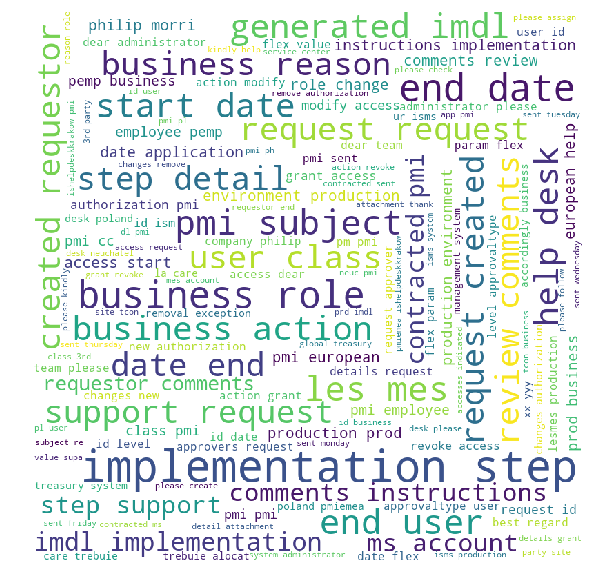

In [181]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in pmi_df.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [250]:
pmi_df.service_new.value_counts()

iSMS                                         25841
LES/MES                                      22344
OMSP                                          4844
Quantum Treasury                              2779
iSMS EZD                                      2526
PLM                                           1836
Flowingly                                     1344
R2D2                                          1247
OmniRIM                                       1237
IQAR                                          1075
COUPA                                         1017
SDMS                                           952
SAM Flexera                                    946
MRM                                            811
Quality System Suite                           780
CRM for HR (iTicket) and Finance (Tick-it      738
GOLD                                           737
TMA                                            708
RDLIMS                                         700
MINT                           

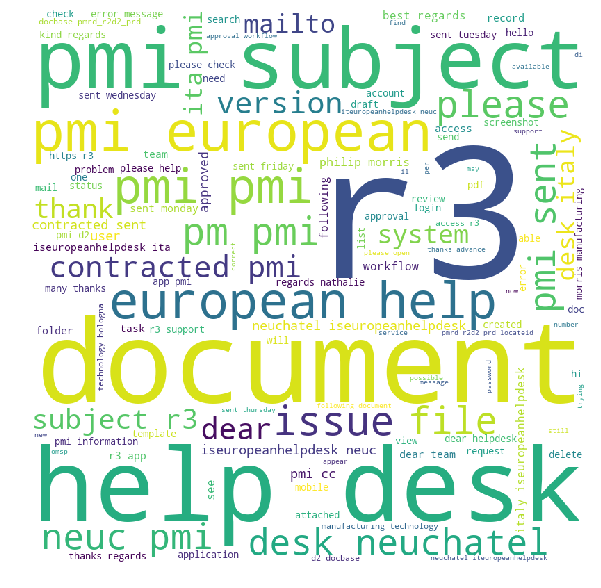

In [259]:
comment_words = '' 
stopwords = set(STOPWORDS) 

pmi_mess_les=pmi_df[pmi_df.service_new == 'R2D2']

pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Request for Information']


# iterate through the csv file 
for val in pmi_mess_les_info.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

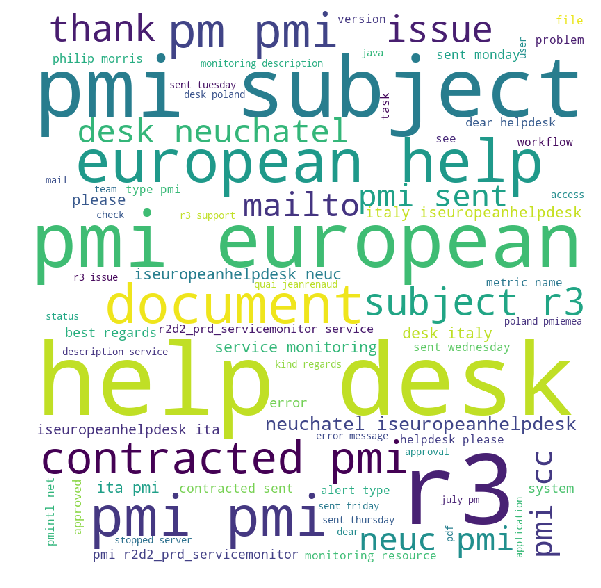

In [270]:
comment_words = '' 
stopwords = set(STOPWORDS) 

pmi_mess_les=pmi_df[pmi_df.service_new == 'R2D2']

pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Incident']


# iterate through the csv file 
for val in pmi_mess_les_info.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

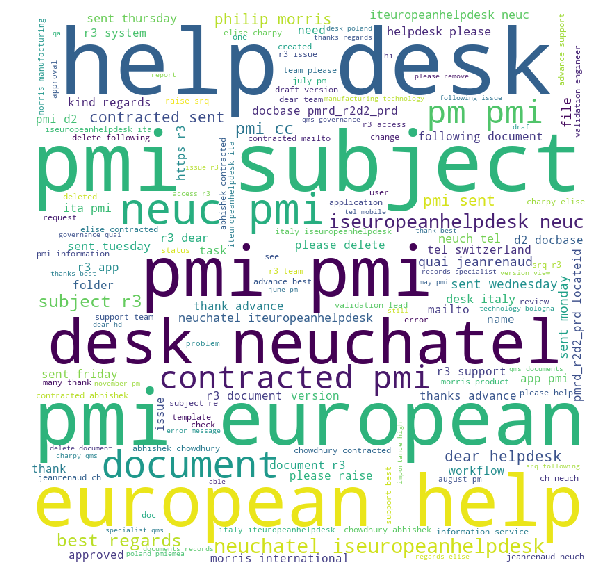

In [278]:
comment_words = '' 
stopwords = set(STOPWORDS) 

pmi_mess_les=pmi_df[pmi_df.service_new == 'R2D2']

pmi_mess_les_info = pmi_mess_les[pmi_mess_les.category=='Request for Change']


# iterate through the csv file 
for val in pmi_mess_les_info.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [326]:
from collections import Counter
import nltk
nltk.download('punkt')

r1 = pmi_df.short_description.values

final_string = "";
for value in r1:
    final_string = final_string  + value + " ";
    

'The Job pmi_erp_iqar_GCRS_Prod_Vol_am failed (RC=1). | PMICHLAUCTM422.PMINTL.NET KeySurvey/Issue- FWP Access 24X7 PMPT // PO 4502527657 XE05 El reporte de QI no funciona para F3 SEE P1 Information - User needs information about ASN file SCHIMBARE BXRTSM34 Kalan Bakiye Fark? Implementation: Grant access for Brcina, Leon (contracted) PMMX ticket carga inciail maptracking AR-MLB-DiscoveRED Campaign 2019: Embedded URLS loading slow PMP  Activate ASN for DIM & Semi\'s ? Outbound flow Printers doesn\'t work MRKLESES- Central Reject CBL checker Rejecting SC MRKLESES- Error in Production Tab Zebra printer doesn\'t print LES labels  brak raportu QTm dla maszyny M55 Problem z generowaniem TO przy za?adunku na Austri? - 1014892011 / Problem with generating TO when loading into Austria - 1014892011 No access to LES/MES Mes\'te girilen duru?lar?n Mes reports\'a akmamas? hak. Paletten nicht im LES / SAP Downtime Assignment We05 idoclar?n temizlenmesi hk. problem z przesunieciem kartonu miedzy stref

In [338]:
stopwords = [' ','The','a', 'about', 'above', 'across', 'after', 'afterwards','again', 'against', 'all', 'almost', 'alone', 'along','already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another','any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became','because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below','beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant','co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due','during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever','every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first','five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give','go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers','herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed','interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made','many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much','must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none','noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or','other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please','put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should','show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime','sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves','then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they','thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to','together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon','us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where','whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who','whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your','yours', 'yourself', 'yourselves']



In [328]:
# Given a list of words, remove any that are
# in a list of stop words.

def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [339]:

wordlist = word_tokenize(final_string)
refwordlist = removeStopwords(wordlist, stopwords)


In [340]:
result =Counter(" ".join(refwordlist).split(" ")).items()

import csv
with open('test.csv', 'w', encoding='utf-8') as f:
    for k,v in result:
        f.write("%s,%s\n"%(k,v))